Starting grid search for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2'}
Best cross-validation score (Accuracy): 0.8386408730158731
Starting grid search for SVC...
Best parameters for SVC: {'C': 0.1, 'kernel': 'rbf'}
Best cross-validation score (Accuracy): 0.8386408730158731
Starting grid search for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Best cross-validation score (Accuracy): 0.8386408730158731
Starting grid search for KNN...
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score (Accuracy): 0.8481646825396826
Starting grid search for ANN...
Best parameters for ANN: {'activation': 'relu', 'hidden_layer_sizes': (100,)}
Best cross-validation score (Accuracy): 0.8163690476190476
Starting grid search for XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.01, 'n_estimators': 50}
Best cross-validation score (Accuracy): 0.8386408730158731
Logistic 

/Users/victoriali/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/victoriali/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

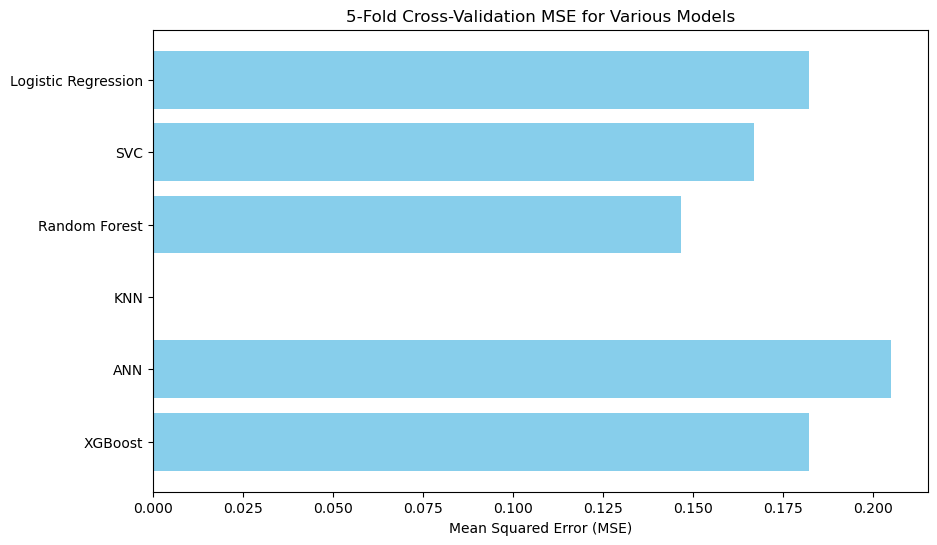

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression  # Changed to LogisticRegression for classification
from sklearn.svm import SVC  # Changed to SVC for classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Changed to Classifier
from sklearn.neighbors import KNeighborsClassifier  # Changed to Classifier
from sklearn.neural_network import MLPClassifier  # Changed to Classifier
from sklearn.metrics import mean_squared_error, accuracy_score  # Added accuracy_score
import time

# Load the dataset
file_path = '/Users/victoriali/Desktop/student-mat.csv'
data = pd.read_csv(file_path, delimiter=';')

# Encode the 'internet' column into binary format before dropping it
data['internet_binary'] = (data['internet'] == 'yes').astype(int)

# Now drop the 'G3', 'school', and original 'internet' column
data = data.drop(['G3', 'school', 'internet'], axis=1)

# One-hot encoding for the remaining categorical variables
data = pd.get_dummies(data)

# Split the dataset into features and target variable for Problem 3
X = data.drop('internet_binary', axis=1)
y = data['internet_binary']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the number of features to half
pca = PCA(n_components=0.95)  # Keeping 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Split dataset into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define models for cross-validation (classification models)
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'ANN': MLPClassifier(max_iter=1000, random_state=42),
    'XGBoost': GradientBoostingClassifier(random_state=42)
}

# Define hyperparameter grids for each model (appropriate for classifiers)
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'ANN': {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['tanh', 'relu']},
    'XGBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Perform grid search for each model
best_models = {}
for model_name, model in models.items():
    print(f"Starting grid search for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score (Accuracy): {grid_search.best_score_}")
    
# Train models and evaluate performance
performance_and_runtime = {}
for name, model in best_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    training_accuracy = accuracy_score(y_train, model.predict(X_train))  # Using accuracy
    
    performance_and_runtime[name] = {
        'Runtime (s)': runtime,
        'Training Accuracy': training_accuracy
    }

# Display the runtime and training accuracy for each model
for model_name, metrics in performance_and_runtime.items():
    print(f"{model_name}:")
    print(f"  Runtime: {metrics['Runtime (s)']:.6f} seconds")
    print(f"  Training Accuracy: {metrics['Training Accuracy']:.2%}\n")

# Make predictions on the validation set and calculate accuracy
validation_performance = {}
for name, model in best_models.items():
    start_time = time.time()
    predictions = model.predict(X_val)
    end_time = time.time()
    accuracy = accuracy_score(y_val, predictions)
    
    validation_performance[name] = {
        'Runtime (s)': end_time - start_time,
        'Validation Accuracy': accuracy
    }

# Display the performance and runtime for prediction on each model
for model_name, metrics in validation_performance.items():
    print(f"{model_name}:")
    print(f"  Prediction Runtime: {metrics['Runtime (s)']:.6f} seconds")
    print(f"  Validation Accuracy: {metrics['Validation Accuracy']:.2%}\n")
    
# Perform 5-fold cross-validation and compute MSE for each model
cv_mse = {name: cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean() for name, model in models.items()}

# Convert negative MSE to positive for visualization
positive_mse = {model: -mse for model, mse in cv_mse.items()}

# Prepare data for bar chart
model_names = list(positive_mse.keys())
scores_values = list(positive_mse.values())

# Create a horizontal bar chart for visualization
plt.figure(figsize=(10, 6))
plt.barh(model_names, scores_values, color='skyblue')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('5-Fold Cross-Validation MSE for Various Models')
plt.gca().invert_yaxis()
plt.show()